<a href="https://colab.research.google.com/github/statscol/glob_test_ds/blob/main/Test_Transacion_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2. Purchases: Unusual Transactions approach
### Description
Using the data we'll train a model to find whether or not a transaction is unusual. This can be achieved by using one of the anomaly detection algorithms such as Isolation Forest based on the Random Forest Bagging Technique. However, data is not in a single file, so we have to download every single file using a selenium bot, merge it and transform it in order to train an Anomaly Detection Model. This is described in the following flowchart.

<br>

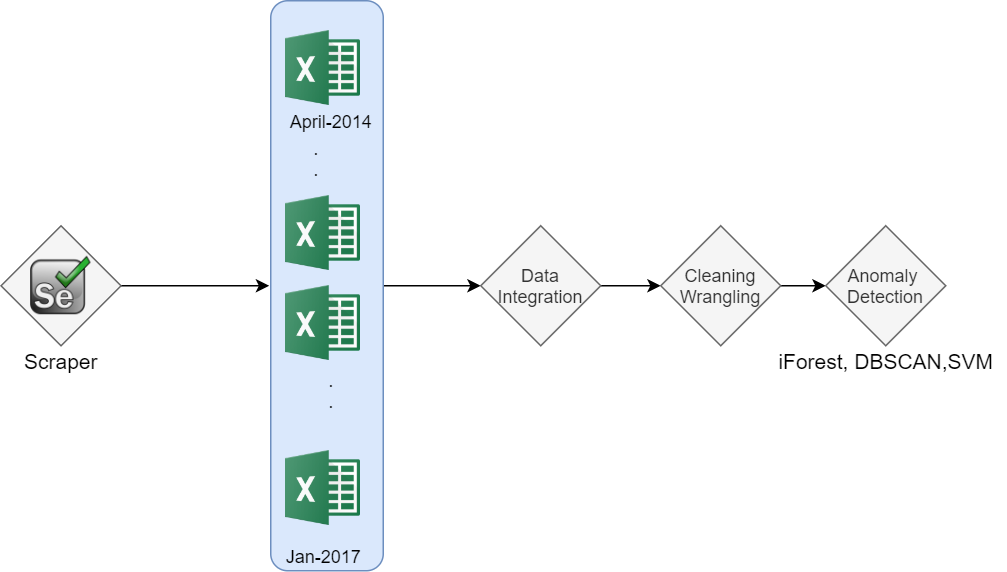


In [ ]:

##pre configuration commands
!pip install selenium
!apt-get update 
!apt install chromium-chromedriver
!mkdir transaction_data


     |████████████████████████████████| 904 kB 4.8 MB/s 
Get:1 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:3 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:5 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Get:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [697 B]
Hit:7 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:8 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release.gpg [836 B]
Hit:9 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:10 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:11 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelea

In [ ]:
from selenium import webdriver
import time

chrome_options_mod = webdriver.ChromeOptions()
chrome_options_mod.add_argument('--headless')
chrome_options_mod.add_argument('--no-sandbox')
chrome_options_mod.add_argument('--disable-dev-shm-usage')
prefs = {'download.default_directory' : '/content/transaction_data'}
chrome_options_mod.add_experimental_option('prefs', prefs)



In [ ]:
###get urls out of the index page site

def get_data_urls(chrome_options):
    
    driver=webdriver.Chrome('chromedriver',chrome_options=chrome_options)


    driver.get('https://data.birmingham.gov.uk/dataset/purchase-card-transactions')
    time.sleep(5) ##lets pretend we're not using a bot
    data_ul=driver.find_element_by_class_name("resource-list")
    links=data_ul.find_elements_by_tag_name("a")
    filesData=[i.get_attribute('href') for i in links if 'xls' in i.get_attribute('href') ]
    driver.close()
    return(filesData)


urls=get_data_urls(chrome_options_mod)
urls[0:5] ##a sneak peek of the url's retrieved

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: use options instead of chrome_options
  """


['https://data.birmingham.gov.uk/dataset/cf552d08-cee9-43bf-8c0f-3196a9311799/resource/b4a15ade-11b1-4c98-88a0-8cd8408212ac/download/purchasecardtransactionsapril2014.xls',
 'https://data.birmingham.gov.uk/dataset/cf552d08-cee9-43bf-8c0f-3196a9311799/resource/a8ebbfdc-6aa1-485c-b8ea-9f63f578ec33/download/purchasecardtransactionsmay2014.xls',
 'https://data.birmingham.gov.uk/dataset/cf552d08-cee9-43bf-8c0f-3196a9311799/resource/70bb21b9-4d25-4a73-b641-faa42b02fda0/download/purchasecardtransactionsjune2014.xls',
 'https://data.birmingham.gov.uk/dataset/cf552d08-cee9-43bf-8c0f-3196a9311799/resource/211b6316-7473-43b7-8461-70cfe4df076e/download/purchasecardtransactionsjuly2014.xls',
 'https://data.birmingham.gov.uk/dataset/cf552d08-cee9-43bf-8c0f-3196a9311799/resource/f82e01b9-9bab-4ef5-b507-749cce10a7a8/download/purchasecardtransactionsaugust2014.xls']

In [ ]:
def download_links(links,chrome_options):
 
    driver =webdriver.Chrome('chromedriver',chrome_options=chrome_options)
    files_downloaded=0
    for i in links:

        print("[INFO] Downloading {}".format(i.split("/")[-1]))
        driver.get(i)
        files_downloaded+=1
        print("[PROGRESS] {:.2%} of files downloaded ".format(files_downloaded/len(links)))
        time.sleep(2)
    driver.close()

    return ("[SUCCESS]")

    

download_links(urls,chrome_options_mod)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: use options instead of chrome_options
  This is separate from the ipykernel package so we can avoid doing imports until


[INFO] Downloading purchasecardtransactionsapril2014.xls
[PROGRESS] 2.27% of files downloaded 
[INFO] Downloading purchasecardtransactionsmay2014.xls
[PROGRESS] 4.55% of files downloaded 
[INFO] Downloading purchasecardtransactionsjune2014.xls
[PROGRESS] 6.82% of files downloaded 
[INFO] Downloading purchasecardtransactionsjuly2014.xls
[PROGRESS] 9.09% of files downloaded 
[INFO] Downloading purchasecardtransactionsaugust2014.xls
[PROGRESS] 11.36% of files downloaded 
[INFO] Downloading purchasecardtransactionsseptember2014.xls
[PROGRESS] 13.64% of files downloaded 
[INFO] Downloading purchasecardtransactionsoctober2014.xls
[PROGRESS] 15.91% of files downloaded 
[INFO] Downloading purchasecardsnov2014.xls
[PROGRESS] 18.18% of files downloaded 
[INFO] Downloading purchasecardsdec2014.xls
[PROGRESS] 20.45% of files downloaded 
[INFO] Downloading purchaseccardtransactionsjanuary2015.xls
[PROGRESS] 22.73% of files downloaded 
[INFO] Downloading publishspendpurchasecardsfebruary.xls
[PROGRE

'[SUCCESS]'

### 2. Data Integration & Cleaning

We have to modify column names before concatenating with the other files in order to prevent column duplicates

In [ ]:
import pandas as pd
import os

files=os.listdir("/content/transaction_data")
data_merged=pd.DataFrame(columns=['TRANS DATE', 'TRANS VAT DESC', 'ORIGINAL GROSS AMT', 'ORIGINAL CUR',
       'BILLING GROSS AMT', 'BILLING CUR CODE', 'MERCHANT NAME', 'CARD NUMBER',
       'TRANS CAC CODE 1', 'TRANS CAC DESC 1', 'TRANS CAC CODE 2',
       'TRANS CAC DESC 2', 'TRANS CAC CODE 3', 'Directorate'])
def adjust_column(col):
  aux=col.strip()
  return aux.replace("Directorates","Directorate")

for f in files:
  data1=pd.read_excel("/content/transaction_data/"+f)
  adj_cols=[adjust_column(i) for i in data1.columns.values]
  data1.columns=adj_cols
  if ("Directorates" in data1.columns.values):
    print(f)
  data_merged=pd.concat((data_merged,data1),axis=0)
  print("[INFO] "+f+" Joined")

[INFO] cusersfinainmndesktoppublish-spend-april-2017.xls Joined
[INFO] publishspendpurchasecardsmarch.xls Joined
[INFO] purchasecardsdec2014.xls Joined
[INFO] purchaseccardtransactionsjanuary2015.xls Joined
[INFO] publish-spend-december-2016.xls Joined
[INFO] cusersfinainmndesktoppublish-spend-january-2018.xls Joined
[INFO] itemisedtransactionsaugust2015publishspendalldirectorates.xls Joined
[INFO] purchasecardtransactionsjune2014.xls Joined
[INFO] publish-spend-july-2016.xls Joined
[INFO] cusersfinainmndesktoppublish-copy-january-2017.xls Joined
[INFO] publish-spend-may-2016.xls Joined
[INFO] cusersfinainmndesktoppublish-spend-august-2017-all-directorates.xls Joined
[INFO] publishing-spend-november-2016.xls Joined
[INFO] publish-spend-april-2016.xls Joined
[INFO] purchasecardtransactionsapril2014.xls Joined
[INFO] publishspendjune2015alldirectorates.xls Joined
[INFO] cusersfinainmndesktoppublish-spend-june--2017.xls Joined
[INFO] cusersfinainmndesktoppublish-spend-july-2017.xls Joined

In [ ]:
## lets look at the final data,seems like Billing Cur Code had a repeated column somewhere in the files considered. However, all the transactions were made in GB Pounds. So we'll skip this for now.
data_merged.head()

,TRANS DATE,TRANS VAT DESC,ORIGINAL GROSS AMT,ORIGINAL CUR,BILLING GROSS AMT,BILLING CUR CODE,MERCHANT NAME,CARD NUMBER,TRANS CAC CODE 1,TRANS CAC DESC 1,TRANS CAC CODE 2,TRANS CAC DESC 2,TRANS CAC CODE 3,Directorate,TRANS TAX AMT,BILLING CUR CODE.1,Unnamed: 10
0,2017-04-28,VR,66.38,GBP,66.38,GBP,millpool service s,************5770,K020,Vehicle Fuel,RV12N,African-Caribbean DC,A00,Adult & Communities,NaN,NaN,NaN
1,2017-04-28,VR,25.25,GBP,25.25,GBP,shell fiveways 387,************1147,K020,Vehicle Fuel,RV1K2,Elders Group - Ladywood,A00,Adult & Communities,NaN,NaN,NaN
2,2017-04-26,VR,81.75,GBP,81.75,GBP,shell fiveways 387,************1147,K020,Vehicle Fuel,RV1K2,Elders Group - Ladywood,A00,Adult & Communities,NaN,NaN,NaN
3,2017-04-07,VR,73.29,GBP,73.29,GBP,shell fiveways 387,************1147,K020,Vehicle Fuel,RV1K2,Elders Group - Ladywood,A00,Adult & Communities,NaN,NaN,NaN
4,2017-04-05,VR,75.70,GBP,75.70,GBP,shell fiveways 387,************1147,K020,Vehicle Fuel,RV1K2,Elders Group - Ladywood,A00,Adult & Communities,NaN,NaN,NaN


In [ ]:
### Transaction Date itself doesnt add much for Anomaly Detection, but the day of the week surely does. Lets get it out of the transaction date using Pandas dt
### We also select a few columns to train the model. Only controllable features were selected (Trans CAC CODE 2 and 3 had a huge number of labels so for the sake of this test, will not be considered)

data_merged['dayWeek']=data_merged["TRANS DATE"].dt.dayofweek
data_mod=data_merged[['ORIGINAL GROSS AMT','dayWeek','TRANS CAC CODE 1','Directorate']]
data_mod.head()

,ORIGINAL GROSS AMT,dayWeek,TRANS CAC CODE 1,Directorate
0,66.38,4.0,K020,Adult & Communities
1,25.25,4.0,K020,Adult & Communities
2,81.75,2.0,K020,Adult & Communities
3,73.29,4.0,K020,Adult & Communities
4,75.70,2.0,K020,Adult & Communities


### 3. Model Training
Given the data conditions, factors with multiple categories (more than 100), we'll need to use a dimensionality reduction technique, such as PCA. This will feed the Anomaly/Outlier detection algorithm.


In [ ]:
from sklearn.preprocessing import LabelEncoder,LabelBinarizer,StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.svm import OneClassSVM
from sklearn_pandas import DataFrameMapper
from sklearn.decomposition import PCA
from sklearn.ensemble import IsolationForest

In [ ]:
##there are some missing values, lets use the median or the mode, this will prevent from changing the true distribution of data
data_mod_imp=data_mod[['TRANS CAC CODE 1','Directorate']].apply(lambda x: x.fillna(x.value_counts().index[0]))
data_mod_imp['ORIGINAL GROSS AMT']=data_mod['ORIGINAL GROSS AMT']
data_mod_imp['dayWeek']=data_mod['dayWeek']
data_mod_imp.dropna(inplace=True)

In [ ]:
##variables to build as one-hot-encoding
to_one_hot=['TRANS CAC CODE 1','Directorate']
mapper_one_hot = DataFrameMapper(
    [(d, LabelBinarizer()) for d in to_one_hot]
)


##Define all the steps, from one_hot encoding to model training in a pipeline

pipeline_forest = Pipeline(steps=[
	("mapper", mapper_one_hot),
	("pca", PCA(n_components = 10)),
	("svm", IsolationForest(contamination=0.01))])


pipeline_forest.fit(X=data_mod_imp)
trans_type=pipeline_forest.predict(data_mod_imp)


In [ ]:
##lets see which transactions are classified as outliers/anom
data_mod_imp['type_transaction']=trans_type
print("[INFO] iForest found that {:.2%} of the transactions were uncommon, possible value at risk: {:.2f} £".format(sum(trans_type==-1)/len(trans_type),sum((trans_type==-1)*data_mod_imp['ORIGINAL GROSS AMT'].values)))

[INFO] iForest found that 0.90% of the transactions were uncommon, possible value at risk: 337963.24 £


### Final Comments and Further Work

We've trained an algorithm based on Random Forest which is able to determine  whether or not a transaction is an anomaly/outlier. This approach could be improved by using more data and other algorithms. However a testing set is compulsory for this kind of analysis. By using it we could assess the quality of the anomaly detection model.